In [40]:
import time
import cv2 as cv
import numpy as np
# from skimage import util
# from skimage import io
# import skimage
import matplotlib.pyplot as plt
#实验二：封装成为一个函数。传入原始灰度图像，画出变换后的直方图。
def exp2(img):
    img_ehist = cv.equalizeHist(img)
    imgb = img[...] - 46
    imgb_ehist = cv.equalizeHist(imgb)
    
    #调整画布大小
    plt.figure(figsize = (16,10), dpi = 100)
    #原始图像
    plt.subplot(231)
    plt.title("Origin Image")
    plt.imshow(img, 'gray')
    #原始图像直方图
    plt.subplot(232)
    plt.title("Histogram")
    plt.hist(img.flatten(), bins = 256, color = 'b')
    #原始图像均衡化后的直方图
    plt.subplot(233)
    plt.title("EqualHist")
    plt.hist(img_ehist.flatten(), bins = 256, color = 'b')
    #灰度降低46后的图像
    plt.subplot(234)
    plt.title("Gray level down 46 image")
    plt.imshow(imgb, 'gray')
    #灰度降低后的直方图
    plt.subplot(235)
    plt.title("Histogram")
    plt.hist(imgb.flatten(), bins = 256, color = 'b')
    #灰度降低后均衡化后的直方图
    plt.subplot(236)
    plt.title("EqualHist")
    plt.hist(imgb_ehist.flatten(), bins = 256, color = 'b')
    
    plt.show()
    return None

#我的测试函数：输入BGR图像，在同一幅图绘制B,G,R各通道的频率分布图，折线表示，也附有散点图。
#仅用于各通道数据分布相对均匀情况下
#速度较慢，对于1千万的像素点，大约需要20s时间跑完
def mytest(img):
    #初始化各个数据,(xb,xg,xr)分别用于统计(R,G,B)通道值相同的像素点个数
    xb = np.zeros(256, dtype = int)
    xg = np.zeros(256, dtype = int)
    xr = np.zeros(256, dtype = int)
    r = img[...,2].flatten()
    g = img[...,1].flatten()
    b = img[...,0].flatten()
    shape = img.shape[0] * img.shape[1]#图像像素点个数
    
    #分别统计RGB三个通道，取相同通道值的像素点的数目
    for i in range(shape):
        xr.itemset(r.item(i), xr.item(r.item(i)) + 1)
        xg.itemset(g.item(i), xg.item(g.item(i)) + 1)
        xb.itemset(b.item(i), xb.item(b.item(i)) + 1)
        
    #剔除各个RGB通道值中，没有像素点取值为它的情况 
    xrr = []; xgg = []; xbb = []; yrr = []; ygg = []; ybb = []
    for i in range(256):
        if (xr.item(i) > 0):
            xrr.append(i)
            yrr.append(xr.item(i))
        if (xg.item(i) > 0):
            xgg.append(i)
            ygg.append(xg.item(i))
        if (xb.item(i) > 0):
            xbb.append(i)
            ybb.append(xb.item(i))
            
    plt.figure(figsize = (10,14), dpi = 150)
    #原图
    plt.subplot(311)
    plt.title("Origin Image")
    plt.imshow(img[...,::-1])
    #折线图
    plt.subplot(312)
    plt.title("Histogram Linegraph")
    plt.plot(xrr, yrr, color = 'r', label = 'Red Channel')
    plt.plot(xgg, ygg, color = 'g', label = 'Green Channel')
    plt.plot(xbb, ybb, color = 'b', label = 'Blue Channel')
    plt.legend()
    #散点图
    plt.subplot(313)
    plt.title("Histogram Scatter")
    plt.scatter(xrr, yrr, color = 'r', label = 'Red Channel', s = 10)
    plt.scatter(xgg, ygg, color = 'g', label = 'Green Channel', s = 10)
    plt.scatter(xbb, ybb, color = 'b', label = 'Blue Channel', s = 10)
    plt.legend()
    plt.show() 

#彩色图像均衡化，原图像输入为BGR图，输出原图像，均衡化后直方图
def RGBHist(img):
    R = img[..., 2].flatten()
    G = img[..., 1].flatten()
    B = img[..., 0].flatten()
    mytest(img)
    curimg = []

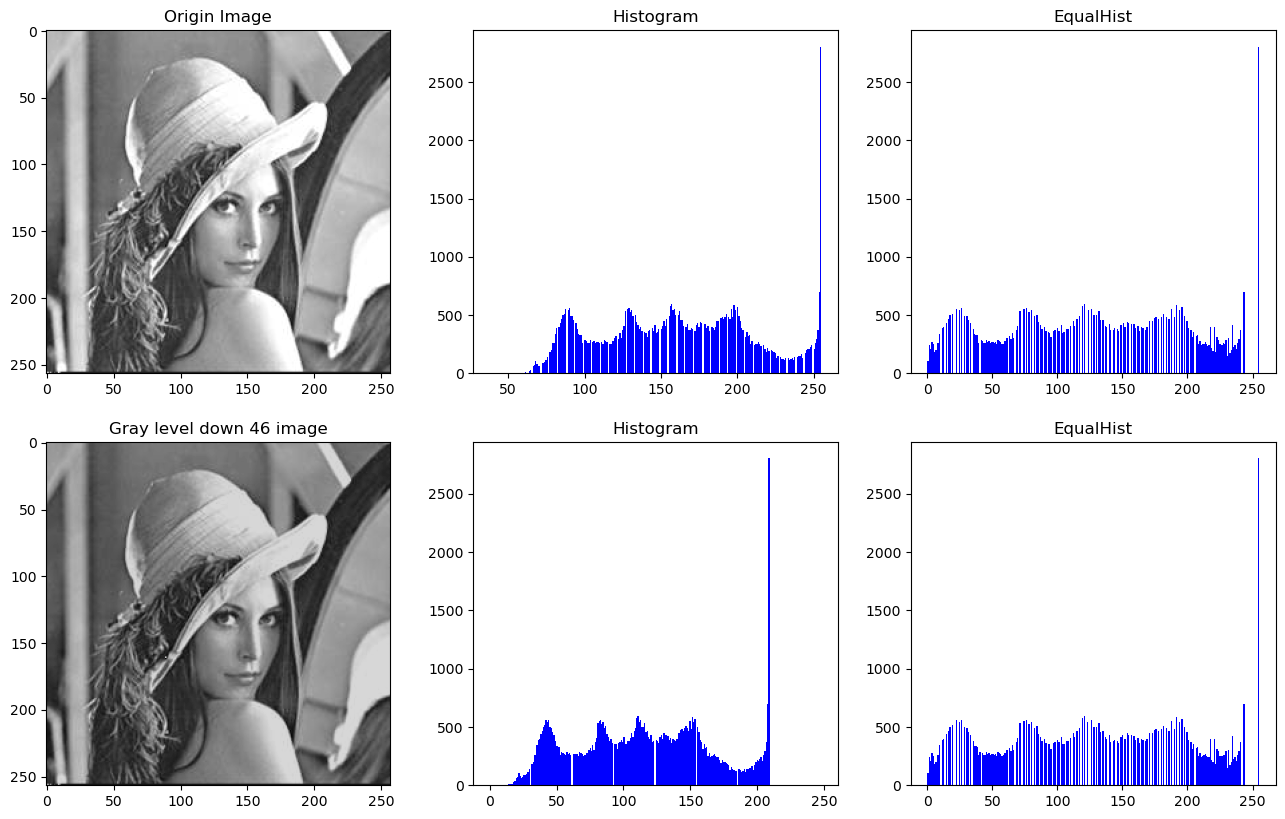

In [3]:
img = cv.imread("C:\\Users\\XRUI\\Desktop\\NewFolder2\\a.jpg", cv.IMREAD_GRAYSCALE)
exp2(img)

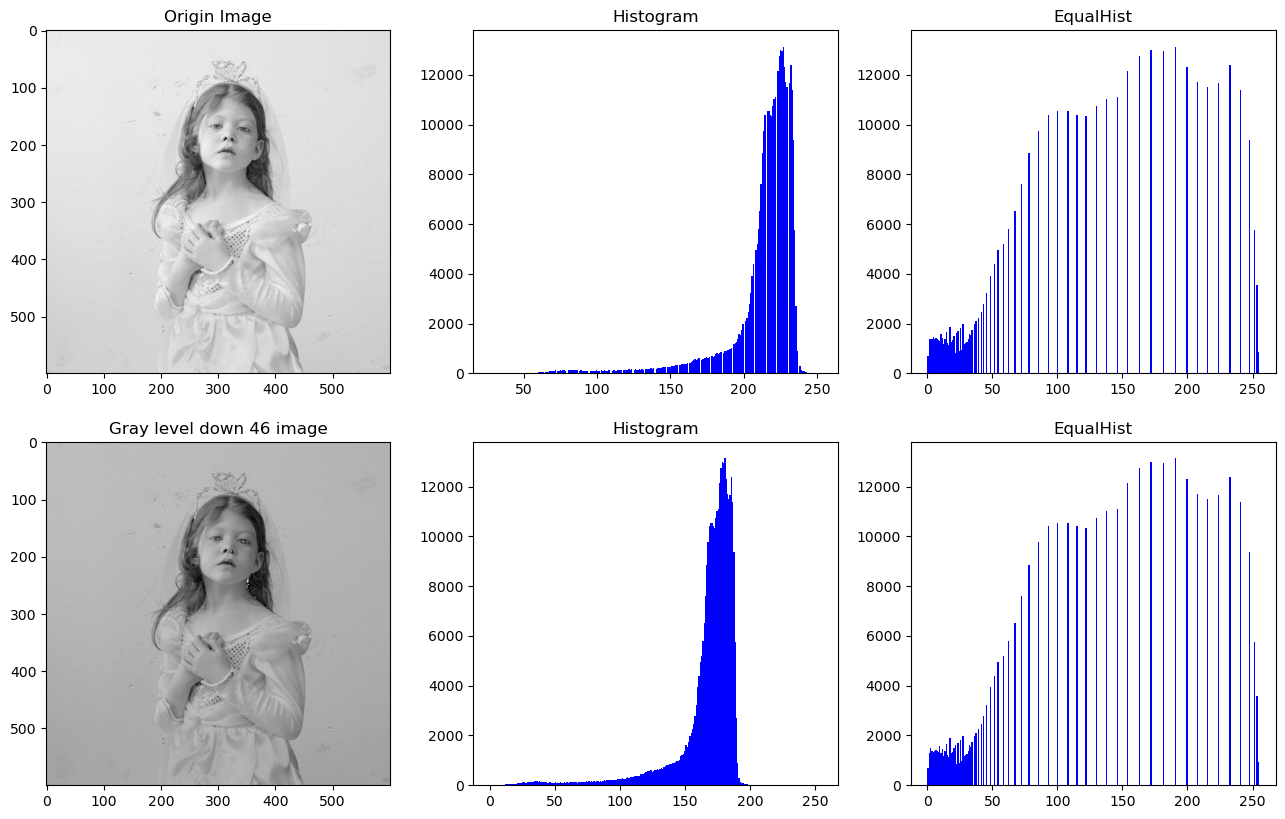

In [3]:
img_gray = cv.imread("C://Users//XRUI//Desktop//NewFolder2/the_bride.jpg", cv.IMREAD_GRAYSCALE)
exp2(img_gray)

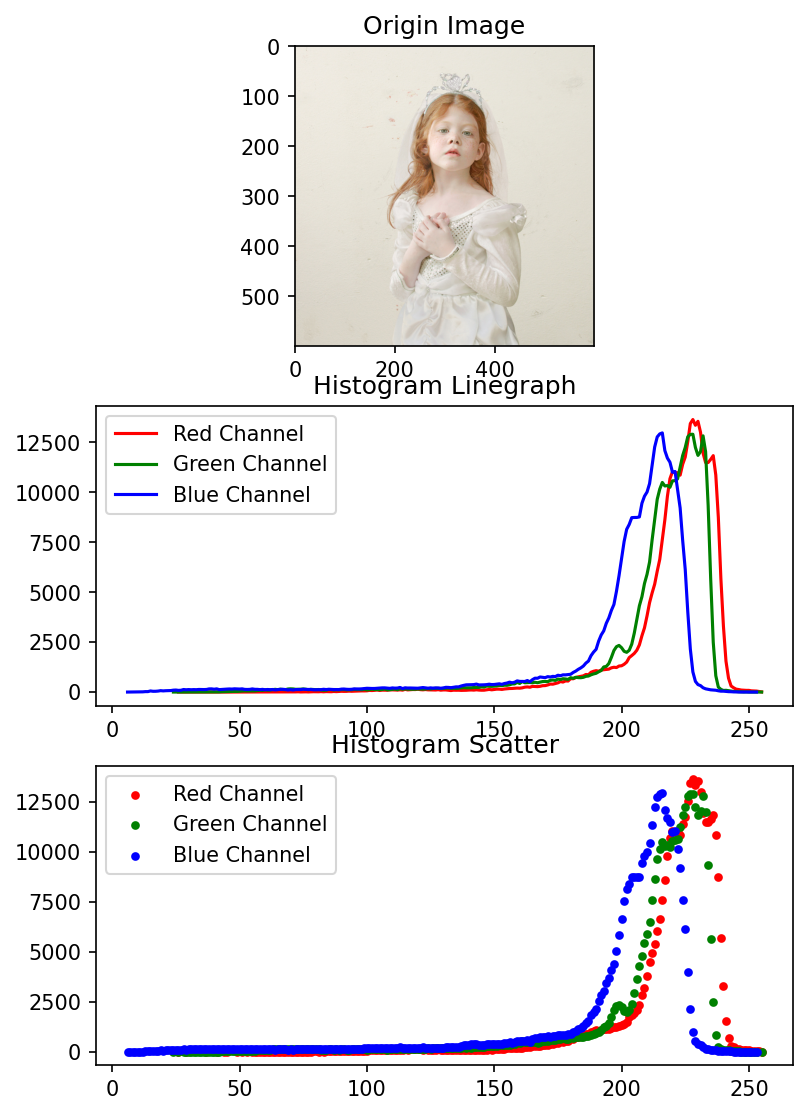

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        6.0000e+00, 2.0000e+00, 0.0000e+00, 1.2000e+01, 6.0000e+00,
        9.0000e+00, 1.1000e+01, 1.4000e+01, 1.2000e+01, 1.1000e+01,
        0.0000e+00, 1.7000e+01, 1.2000e+01, 2.4000e+01, 2.7000e+01,
        2.4000e+01, 2.3000e+01, 2.5000e+01, 3.0000e+01, 0.0000e+00,
        3.2000e+01, 3.7000e+01, 4.2000e+01, 4.5000e+01, 6.3000e+01,
        5.4000e+01, 6.6000e+01, 0.0000e+00, 6.9000e+01, 6.8000e+01,
        7.4000e+01, 8.5000e+01, 8.2000e+01, 9.4000e+01, 1.1400e+02,
        1.2500e+02, 0.0000e+00, 1.0400e+02, 9.6000e+01, 1.3400e+02,
        1.1400e+02, 1.3900e+02, 1.5000e+02, 1.1800e+02, 0.0000e+00,
        1.5300e+02, 1.5500e+02, 1.5800e+02, 1.3200e+02, 1.5400e+02,
        1.1900e+02, 1.2500e+02, 1.4800e+02, 0.0000e+00, 1.1600e+02,
        1.2000e+02, 1.1000e+02, 9.8000e+01, 1.14

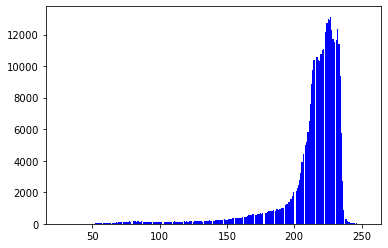

In [17]:
img_time1 = cv.imread("C://Users//XRUI//Desktop//NewFolder2/the_bride.jpg")
img_tmp = img_time1.copy()
img_tmp = cv.cvtColor(img_time1, cv.COLOR_BGR2GRAY)
mytest(img_time1)
plt.hist(img_tmp.flatten(), bins = 256, color = 'b')

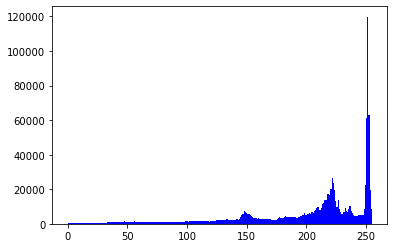

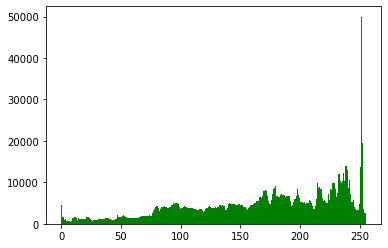

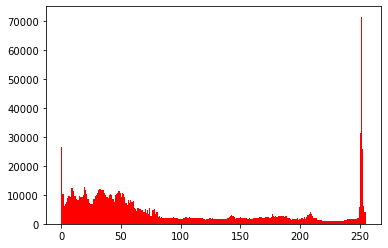

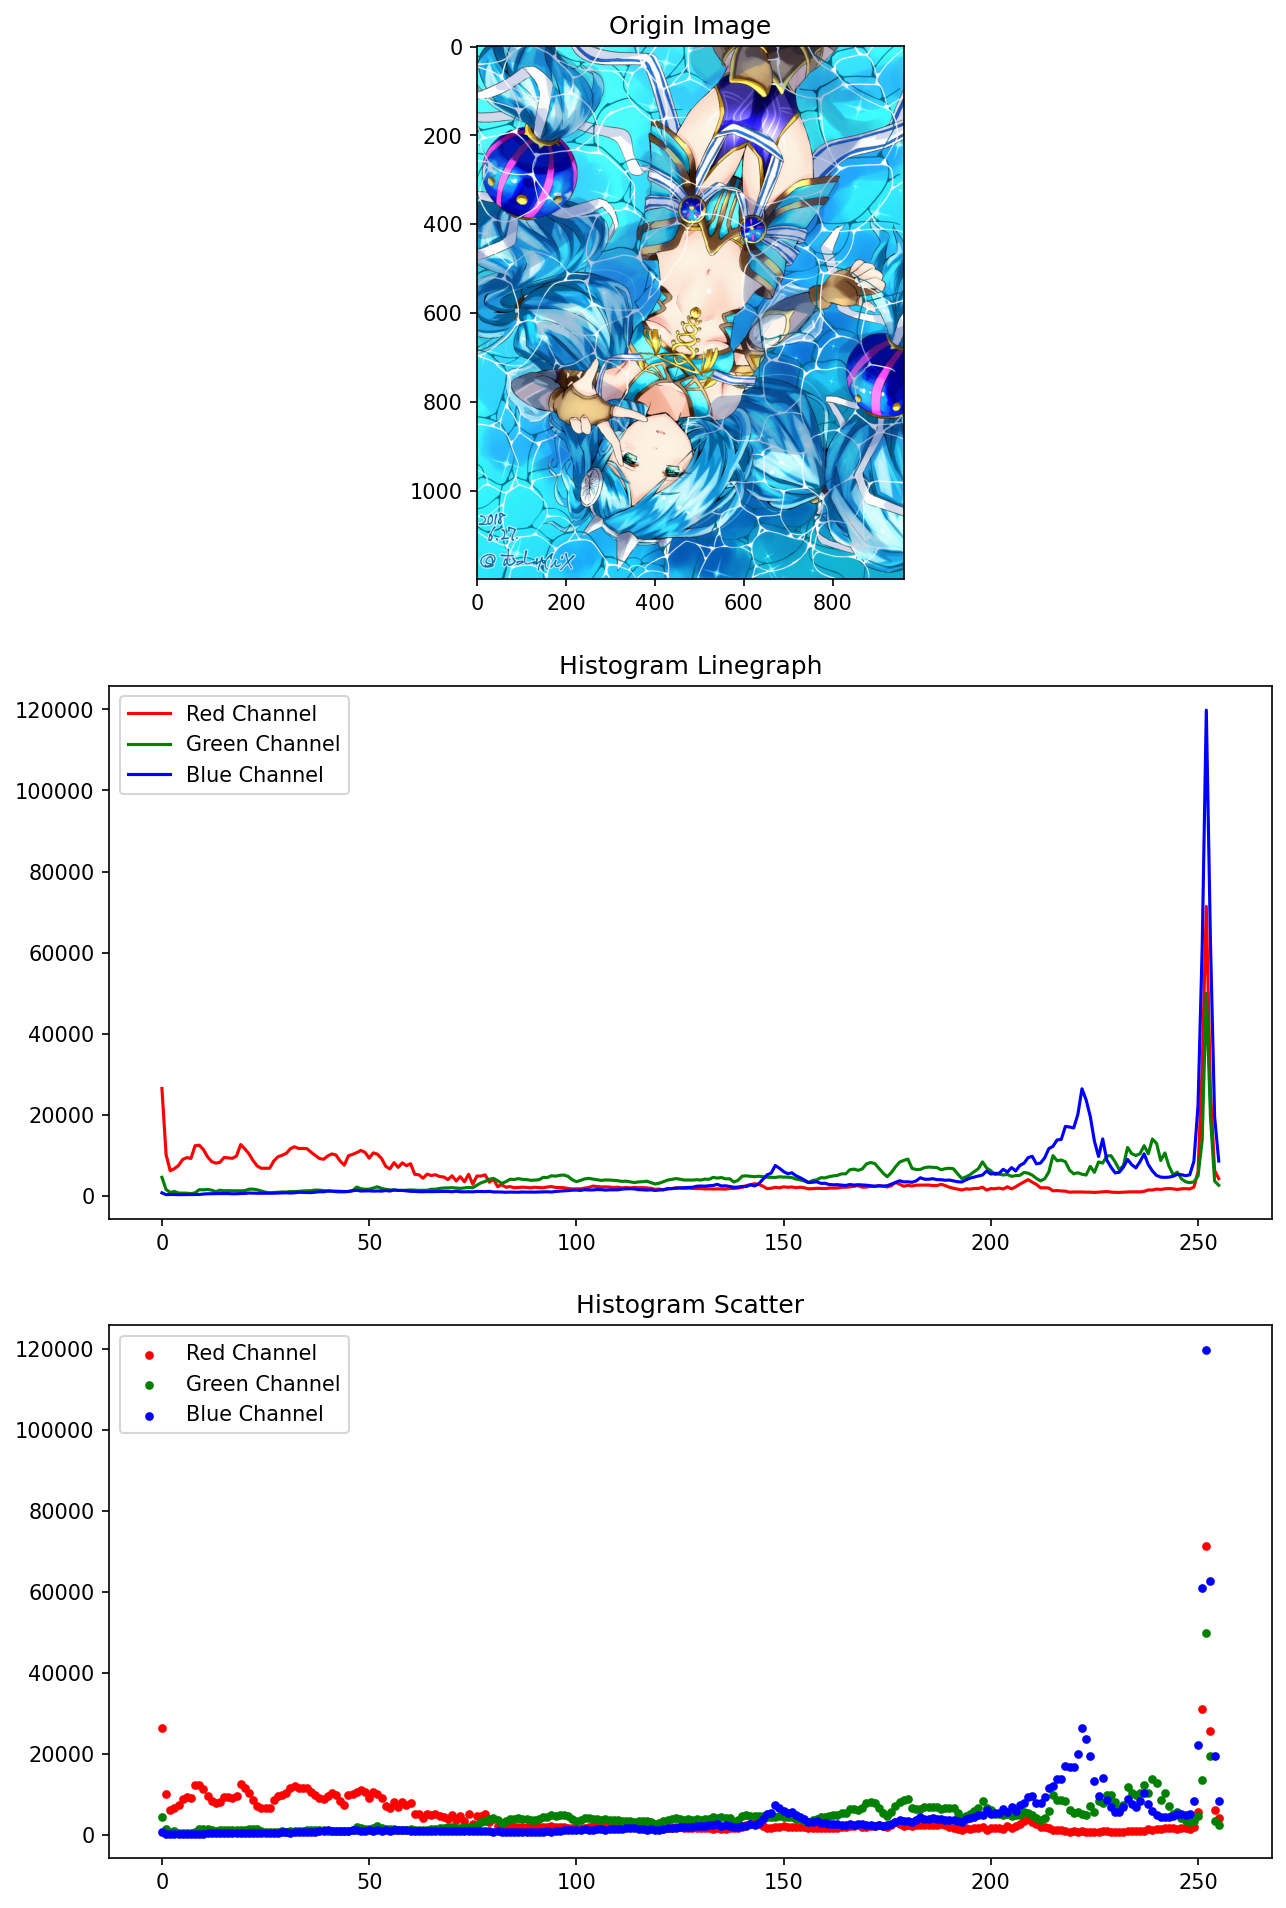

In [49]:
img_time3 = cv.imread("C://Users//XRUI//Desktop//NewFolder2//time2.jpg")

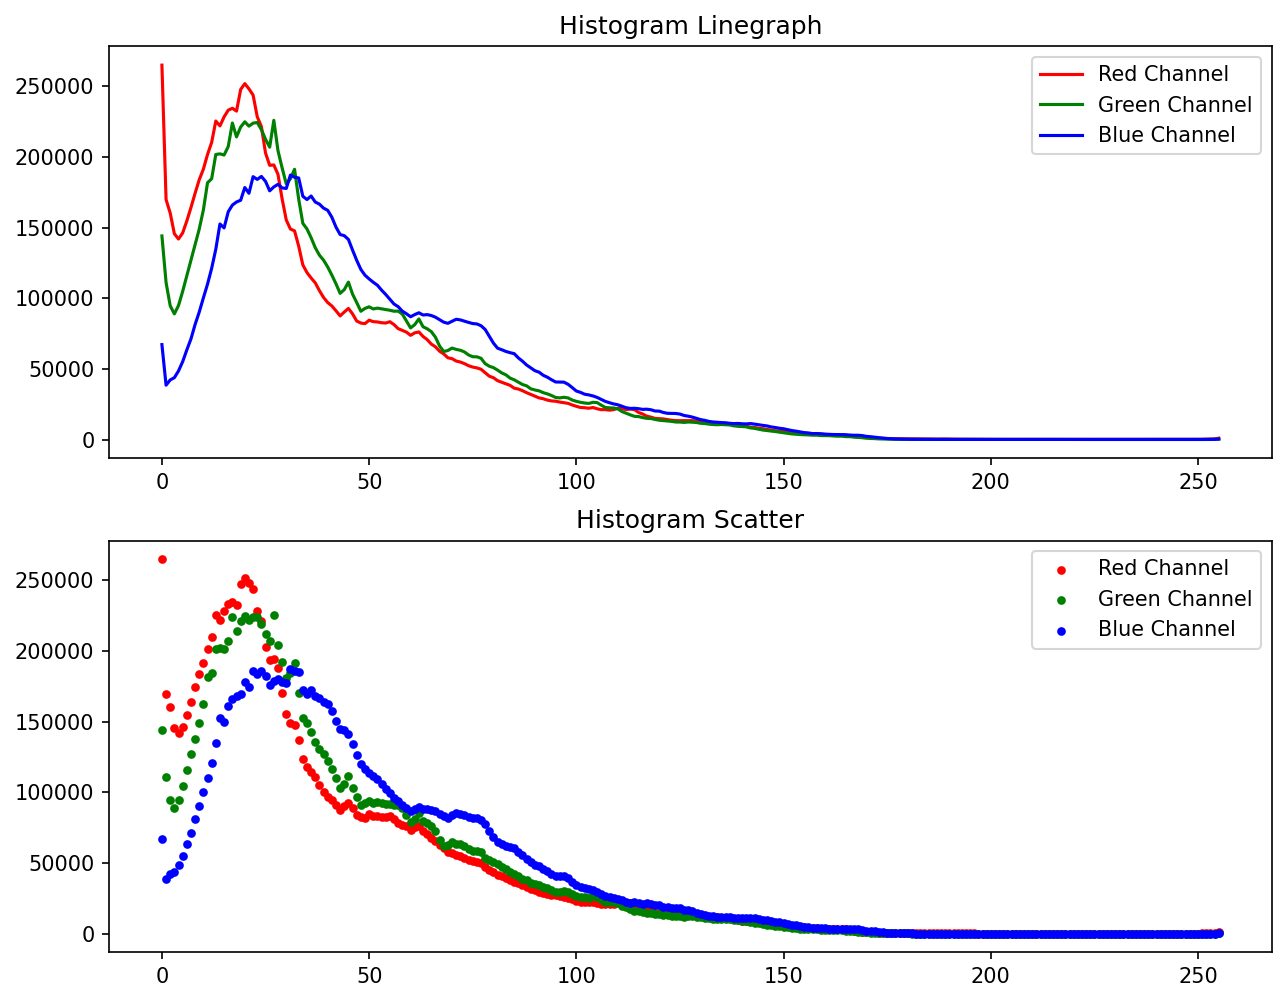

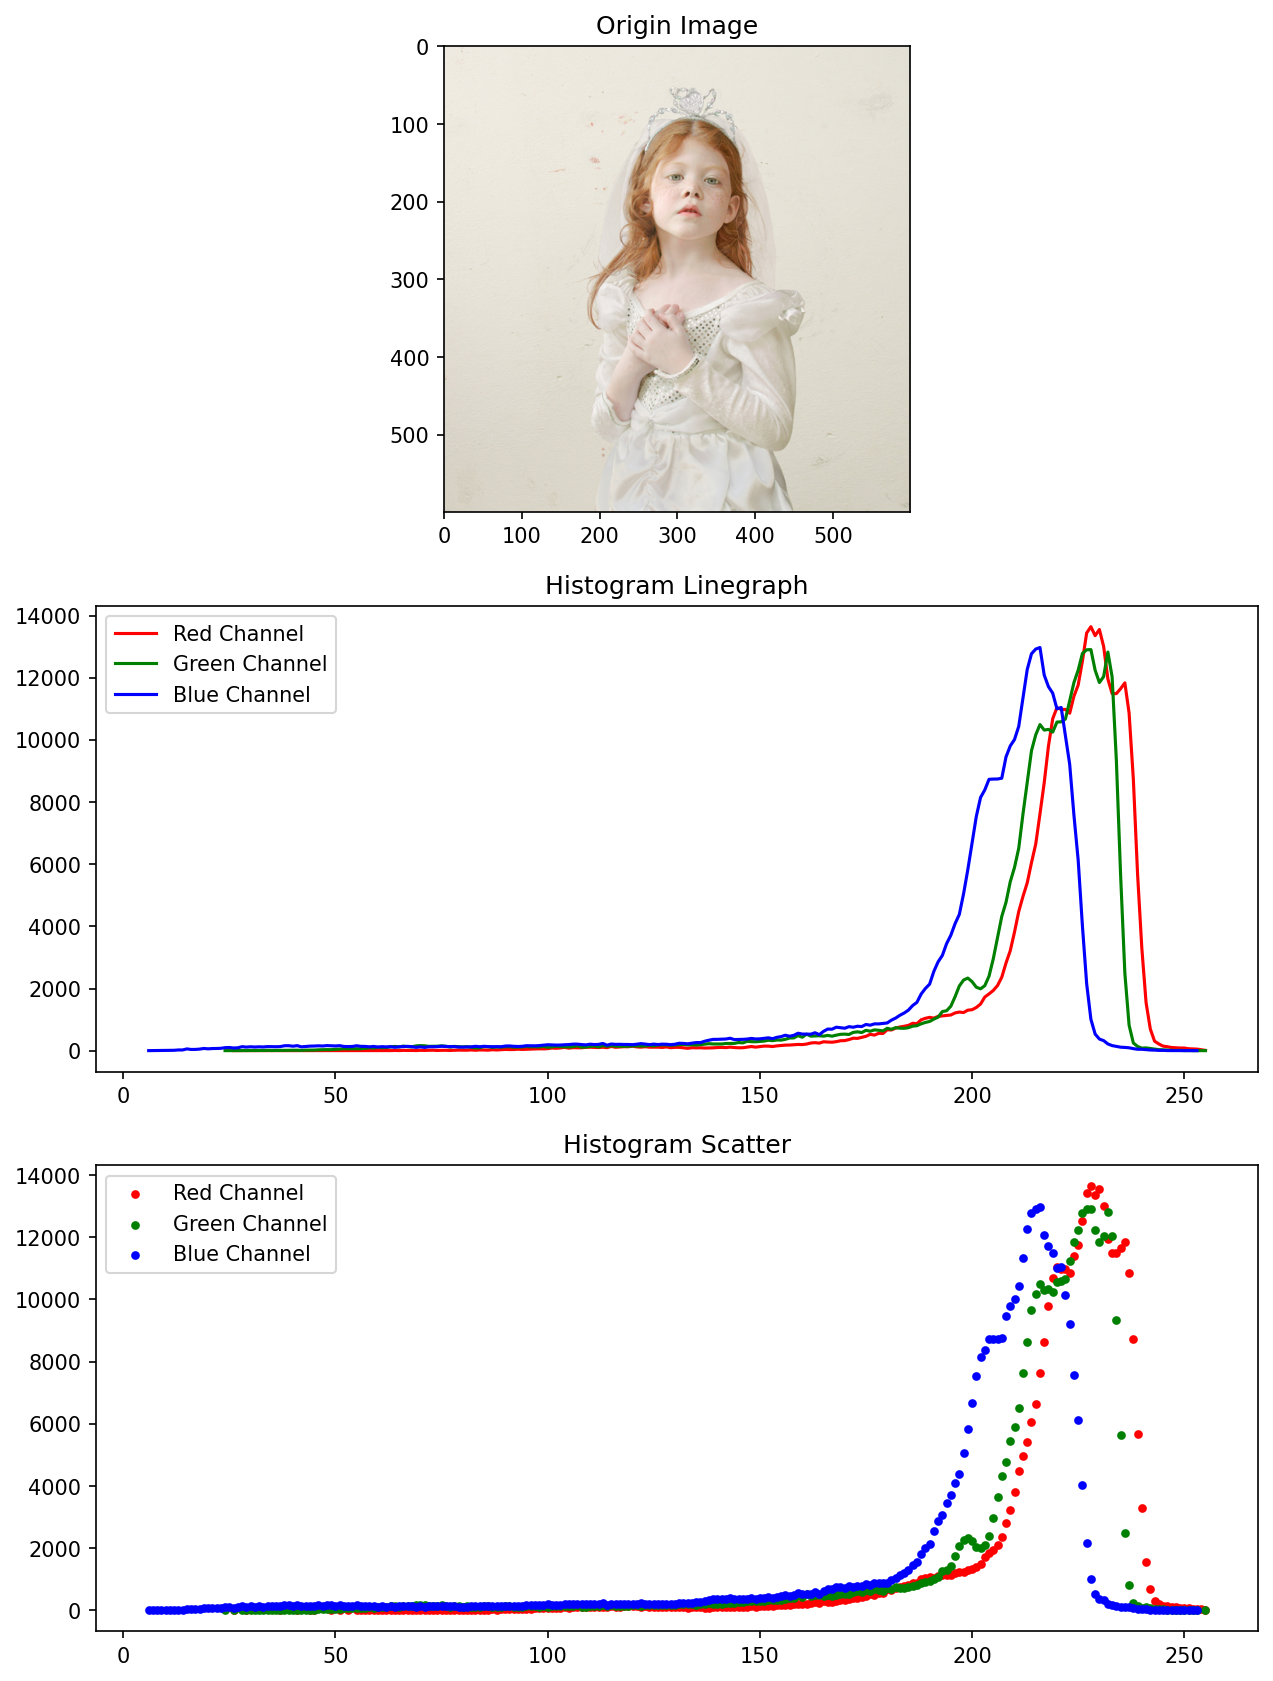

In [21]:
img_time1 = cv.imread("C://Users//XRUI//Desktop//NewFolder2/the_bride.jpg")
mytest(img_time1)

In [3]:
24//25

0

In [8]:
print(list(range(1,9)))

[1, 2, 3, 4, 5, 6, 7, 8]


In [47]:
c = 'a {}'.format('hello') + ' {}'
c = c.format('type')
c = c.upper()
print(c)

A HELLO TYPE


In [44]:
imgg = cv.imread("C:/Users/XRUI/Desktop/Pictures/tmp.png")
imgg.shape[0]

1175